# 1. PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##reading Dataset
Countries = pd.read_csv("E:\Sushma\PCA\Assignment\Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [3]:
Countries_Original = Countries
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Sanity Check 
print ("Shape", Countries.shape)
print ("\n\nInfo\n", Countries.info())
print ("\n\nDescription\n", Countries.describe())
# Countries.info()

Shape (167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Info
 None


Description
        child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.

In [5]:
#Na Handling --- No NULLS to be eliminated
print ("\n\n Nulls if any\n",Countries.isnull().values.any())
print ("\n\n Nulls if all\n",Countries.isnull().values.sum())



 Nulls if any
 False


 Nulls if all
 0


In [6]:
Countries_PCA = Countries.drop(['country'], axis=1)


In [7]:
# Countries_PCA.pop('country')
Countries_PCA.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
Countries_PCA.shape

(167, 9)

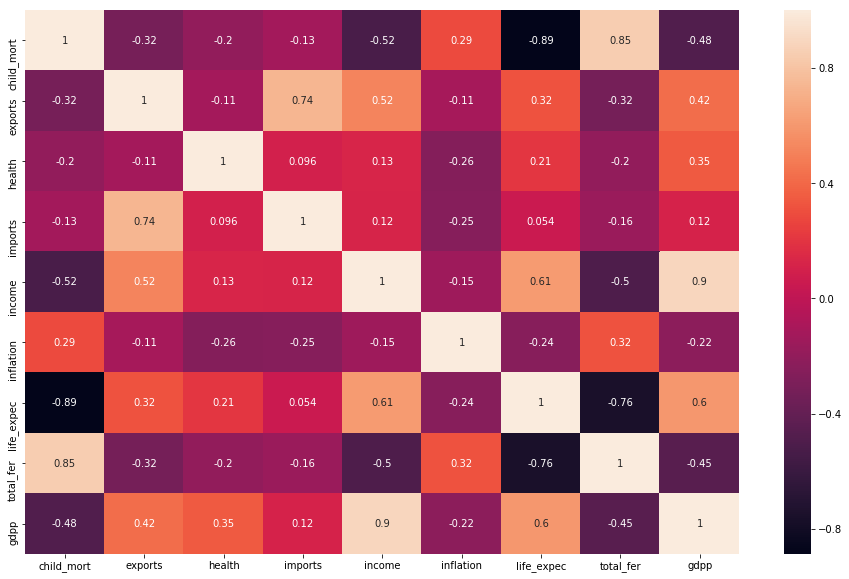

In [9]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(Countries_PCA.corr(),annot = True)

Basic EDA shows that imports and exports are highly collinear, followed negatively by child_mortality rate and life_expectancy

Lets do PCA with SVD methodology

In [10]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=50)

In [11]:
pca.fit(Countries_PCA)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

In [12]:
pca.components_


array([[-8.07327698e-04,  5.11348092e-04,  2.52724061e-05,
         1.14384869e-04,  7.26746756e-01, -7.65998651e-05,
         2.13850032e-04, -2.87952778e-05,  6.86904777e-01],
       [-5.57055026e-04,  9.41707964e-04, -2.15627987e-04,
         5.41883715e-05,  6.86903991e-01,  2.85616792e-04,
         2.66353737e-05, -2.40728708e-05, -7.26747258e-01],
       [ 9.25215339e-01, -2.28627282e-01, -9.25844014e-03,
        -2.42704100e-01,  1.17358496e-03,  8.73842384e-02,
        -1.55747044e-01,  2.86462224e-02,  1.16146666e-04],
       [ 3.28783999e-01,  6.52814366e-01, -7.58649598e-03,
         6.78156522e-01, -4.12812338e-04, -2.19844970e-02,
        -7.23212922e-02,  8.16973465e-03,  2.44967157e-04],
       [-3.94786565e-02,  5.94987240e-01, -7.77516009e-02,
        -5.29179120e-01, -6.84017169e-04,  5.95872597e-01,
         5.69356462e-02,  7.02425075e-03,  3.74367532e-04],
       [-6.08330796e-02, -4.01990656e-01,  5.54312529e-02,
         4.41412073e-01,  1.95004065e-04,  7.978499

In [13]:
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

In [14]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [94.8  5.2  0.   0.   0.   0.   0.   0.   0. ]


The variance ratio shows that only 2 components are enough to do the modelling. Hence we can choose 2 as our dimensions.

In [15]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'Feature':Countries_PCA.columns })
components

,PC1,PC2,PC3,Feature
0,-0.000807,-0.000557,0.925215,child_mort
1,0.000511,0.000942,-0.228627,exports
2,0.000025,-0.000216,-0.009258,health
3,0.000114,0.000054,-0.242704,imports
4,0.726747,0.686904,0.001174,income
5,-0.000077,0.000286,0.087384,inflation
6,0.000214,0.000027,-0.155747,life_expec
7,-0.000029,-0.000024,0.028646,total_fer
8,0.686905,-0.726747,0.000116,gdpp


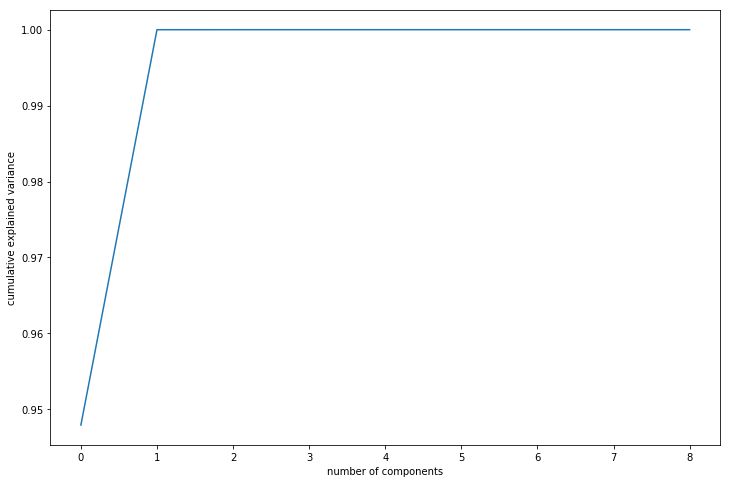

In [16]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

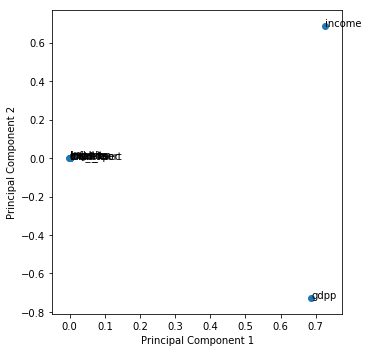

In [17]:
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

GDPP and income are those 2 components that can be used for our clustering

Just to see what an incremental PCA would show us.

In [18]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=9)

In [19]:
U, s, VT = np.linalg.svd(Countries_PCA, full_matrices=0)

In [20]:
s

array([4.33547092e+05, 8.15635234e+04, 1.01650158e+03, 4.49350195e+02,
       2.98137776e+02, 1.49777287e+02, 1.09392439e+02, 2.67184658e+01,
       1.01698190e+01])

In [21]:
U[0]

array([-0.00364683, -0.0077448 , -0.10443446,  0.07609571,  0.00106716,
       -0.08943004, -0.06279426,  0.00490595, -0.12981105])

In [22]:
VT

array([[-2.50831759e-04, -1.08749581e-03, -1.44528920e-04,
        -9.61447024e-04, -7.57832441e-01, -1.03418990e-04,
        -1.47130086e-03, -3.91099845e-05, -6.52445878e-01],
       [-1.42343122e-03, -1.87282758e-03, -1.52840786e-05,
        -1.56359599e-03, -6.52437369e-01, -5.87778767e-04,
        -2.26985596e-03, -1.01012013e-04,  7.57833751e-01],
       [-5.98081282e-01, -3.04674782e-01, -5.96081698e-02,
        -4.54358343e-01,  3.63015323e-03, -8.21201539e-02,
        -5.75755112e-01, -3.49910571e-02, -1.48253017e-03],
       [ 7.48305494e-01, -4.23764717e-01, -1.39937343e-02,
        -4.61773617e-01,  1.31901098e-03,  8.08137727e-02,
        -2.00061107e-01,  2.17853708e-02,  7.18528398e-06],
       [-2.70127785e-01, -4.67716466e-01,  7.61938887e-02,
        -3.28123369e-01, -2.05598611e-04,  8.22020281e-02,
         7.66761365e-01,  1.10273683e-02, -1.53886402e-04],
       [-3.87771708e-02,  5.93145158e-01, -7.68671319e-02,
        -5.28266407e-01, -6.84145353e-04,  5.977901

Outlier Treatment

In [23]:
Countries_PCA['index_values'] = Countries_PCA.index.values

In [24]:
Q1 = Countries_PCA.income.quantile(0.25)
Q3 = Countries_PCA.income.quantile(0.75)
IQR = Q3 - Q1
Countries_PCA_Outlier_Income = Countries_PCA[Countries_PCA.income > Q3 + 1.5*IQR]

In [25]:
Countries_PCA_Outlier_Income #our outliers are stored in this df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,index_values
23,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,23
82,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,82
91,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,91
114,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,114
123,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,123
133,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,133
145,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,145
157,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,157


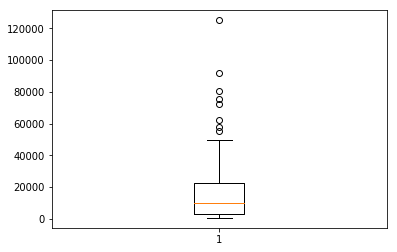

In [26]:
# outlier treatment for Income
plt.boxplot(Countries_PCA.income)
Q1 = Countries_PCA.income.quantile(0.25)
Q3 = Countries_PCA.income.quantile(0.75)
IQR = Q3 - Q1
Countries_PCA = Countries_PCA[(Countries_PCA.income >= Q1 - 1.5*IQR) & (Countries_PCA.income <= Q3 + 1.5*IQR)]

In [27]:
Countries_PCA.loc[Countries_PCA['index_values'] == 82] #ONE OF THE INCOME OUTLIERS THAT WERE REMOVED

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,index_values


{'whiskers': [<matplotlib.lines.Line2D at 0x2a6f34b3cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6f34bf5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6f34b3ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x2a6f34bfe48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6f34c62b0>],
 'means': []}

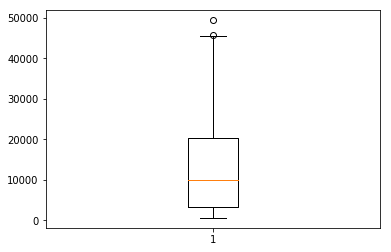

In [28]:
plt.boxplot(Countries_PCA.income)

In [29]:
Q1 = Countries_PCA.gdpp.quantile(0.25)
Q3 = Countries_PCA.gdpp.quantile(0.75)
IQR = Q3 - Q1

Countries_PCA_Outlier_GDPP = Countries_PCA[Countries_PCA.gdpp > Q3 + 1.5*IQR]
# Countries_PCA[Countries_PCA.gdpp > Q3 + 1.5*IQR]

# Countries_PCA.gdpp.max()

In [30]:
Countries_PCA_Outlier_GDPP

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,index_values
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,7
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,8
15,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,15
29,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,29
42,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,42
44,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,44
53,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,53
54,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,54
58,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,58
68,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,68


These are the outliers for GDPP but when we closely look at the data, income values and GDPP are balanced. Whether we remove them or keep them, the outcome wont affect our results. we have to focus on countries that need aid based on their economic, social or health backgrounds but these dont need attention as their economically and health-wise doing just fine. They might all appear to be in the same cluster eventually which is yet to be seen.

{'whiskers': [<matplotlib.lines.Line2D at 0x2a6f35152e8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6f3515ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6f3515198>],
 'medians': [<matplotlib.lines.Line2D at 0x2a6f351e438>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6f351e860>],
 'means': []}

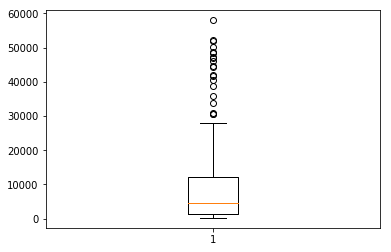

In [31]:
# outlier treatment for gdpp
plt.boxplot(Countries_PCA.gdpp)
# Q1 = Countries_PCA.gdpp.quantile(0.25)
# Q3 = Countries_PCA.gdpp.quantile(0.75)
# IQR = Q3 - Q1
# Countries_PCA = Countries_PCA[(Countries_PCA.gdpp >= Q1 - 1.5*IQR) & (Countries_PCA.gdpp <= Q3 + 1.5*IQR)]

Although GDP has outliers, we wont remove them as it is a column that indicates the growth of a country per capita and eliminating it might lead to loss of information. Instead we can choose to scale the columns to avoid huge differences in our clustering methods.

## 2. K Means clustering

In [32]:
Countries_KMeans = Countries_PCA[['income', 'gdpp']]

Standardise the parameters

In [33]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Countries_norm1 = standard_scaler.fit_transform(Countries_KMeans)

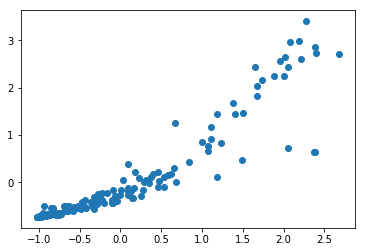

In [34]:
plt.scatter(Countries_norm1[:,0], Countries_norm1[:,1])

Let us check if this model can be clustered in K Means?

2.1 Hopkins Stats Test

In [35]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
Countries_norm1_df = pd.DataFrame(Countries_norm1)
hopkins(Countries_norm1_df)

0.8644869492278594

85% + - Looks good for K Means

2.2 SSD check?

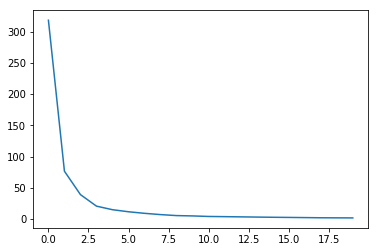

In [37]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50) #2,3 flat
    model_clus.fit(Countries_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

Looks like 3 K clusters will give us the ideal outcome.

Lets do the K means iteratively till we get a best centroid

In [38]:
final_cents = []
final_inert = []
NUM_CLUSTERS = 3     # k
NUM_ITER = 4     # n
NUM_ATTEMPTS = 4    # m
    
for sample in range(NUM_ATTEMPTS):
#     print('\nCentroid attempt: ', sample)
    km = KMeans(n_clusters=NUM_CLUSTERS, init='random', max_iter=NUM_ITER, n_init=1)#, verbose=1) 
    km.fit(Countries_norm1)
    inertia_start = km.inertia_
    intertia_end = 0
    cents = km.cluster_centers_
        
    for iter in range(NUM_ITER):
        km = KMeans(n_clusters=NUM_CLUSTERS, init=cents, max_iter=NUM_ITER, n_init=1)
        km.fit(Countries_norm1)
        print('Iteration: ', iter)
        print('Inertia:', km.inertia_)
        print('Centroids:', km.cluster_centers_)
        inertia_end = km.inertia_
        cents = km.cluster_centers_

    final_cents.append(cents)
    final_inert.append(inertia_end)     

print('Difference between initial and final inertia: ', inertia_start-inertia_end)

Iteration:  0
Inertia: 39.35569486097056
Centroids: [[ 0.45605201  0.13313271]
 [-0.67908677 -0.58278645]
 [ 1.92796511  2.08497516]]
Iteration:  1
Inertia: 39.35569486097056
Centroids: [[ 0.45605201  0.13313271]
 [-0.67908677 -0.58278645]
 [ 1.92796511  2.08497516]]
Iteration:  2
Inertia: 39.35569486097056
Centroids: [[ 0.45605201  0.13313271]
 [-0.67908677 -0.58278645]
 [ 1.92796511  2.08497516]]
Iteration:  3
Inertia: 39.35569486097056
Centroids: [[ 0.45605201  0.13313271]
 [-0.67908677 -0.58278645]
 [ 1.92796511  2.08497516]]
Iteration:  0
Inertia: 39.419779187048455
Centroids: [[ 1.92796511  2.08497516]
 [-0.69146908 -0.58863047]
 [ 0.42941577  0.11198166]]
Iteration:  1
Inertia: 39.35569486097056
Centroids: [[ 1.92796511  2.08497516]
 [-0.67908677 -0.58278645]
 [ 0.45605201  0.13313271]]
Iteration:  2
Inertia: 39.35569486097056
Centroids: [[ 1.92796511  2.08497516]
 [-0.67908677 -0.58278645]
 [ 0.45605201  0.13313271]]
Iteration:  3
Inertia: 39.35569486097056
Centroids: [[ 1.9279

In [39]:
# Get best centroids to use for full clustering
best_cents = final_cents[final_inert.index(min(final_inert))]
best_cents

array([[ 0.45605201,  0.13313271],
       [-0.67908677, -0.58278645],
       [ 1.92796511,  2.08497516]])

In [40]:
km_full = KMeans(n_clusters=NUM_CLUSTERS, init=best_cents, max_iter=100, verbose=1, n_init=1)
km_full.fit(Countries_norm1)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 39.35569486097056
center shift 0.000000e+00 within tolerance 1.000000e-04


KMeans(algorithm='auto', copy_x=True,
    init=array([[ 0.45605,  0.13313],
       [-0.67909, -0.58279],
       [ 1.92797,  2.08498]]),
    max_iter=100, n_clusters=3, n_init=1, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=1)

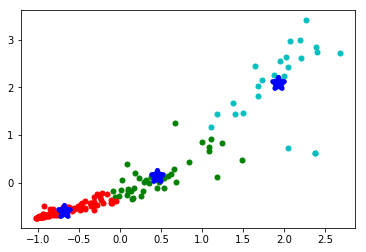

In [41]:
# kmeans = KMeans(n_clusters=5)
# kmeans.fit(Countries_norm1)

centroids = km.cluster_centers_
labels = km.labels_

# print(centroids)
# print(labels)

colors = ["g.","r.","c.","y.","b."]

for i in range(len(Countries_norm1)):
#     print("coordinate:",Countries_norm1[i], "label:", labels[i])
    plt.plot(Countries_norm1[i][0], Countries_norm1[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "*", s=150, linewidths = 5, zorder = 10,c='b')

plt.show()


2.3 Silhouette Analysis score and graph

In [42]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
range_n_clusters = list (range(2,5))
print ("Number of clusters from 2 to 4: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(Countries_norm1_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score (Countries_norm1_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}.".format(n_clusters, score))

Number of clusters from 2 to 4: 
 [2, 3, 4]
For n_clusters = 2, silhouette score is 0.7268080029590288.
For n_clusters = 3, silhouette score is 0.6170777495853501.
For n_clusters = 4, silhouette score is 0.608293518176961.


In [44]:

sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(Countries_norm1)
    sse_.append([k, silhouette_score(Countries_norm1, kmeans.labels_)])

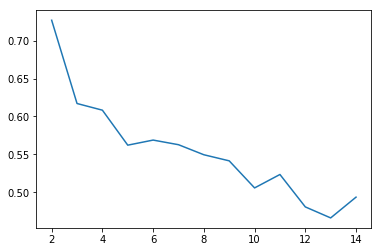

In [45]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

The first peak is at 3

Creating a mapping of the clusters and the original data

In [46]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = Countries_norm1_df.index.values
cluster_map['cluster'] = kmeans.labels_

In [47]:
cluster_map.head(25)

,data_index,cluster
0,0,5
1,1,11
2,2,11
3,3,2
4,4,10
5,5,10
6,6,2
7,7,6
8,8,13
9,9,1


In [48]:
print (cluster_map.shape)
print (Countries_PCA.shape)

(159, 2)
(159, 10)


# 3. Hierarchical Clustering

3.1 Dendrogram

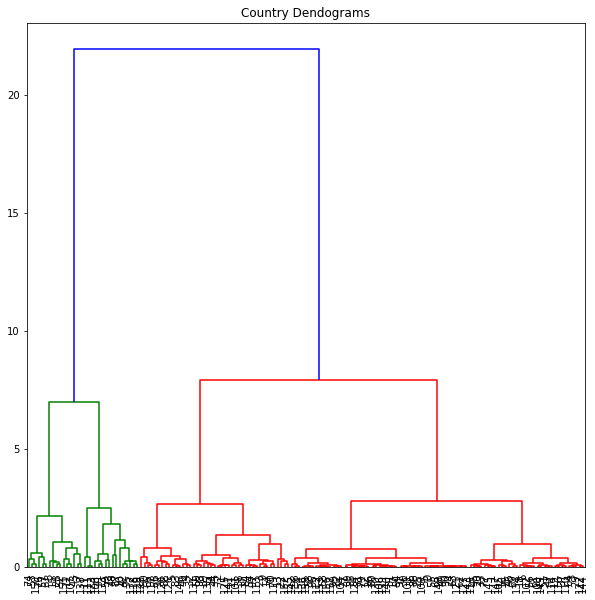

In [49]:
import scipy.cluster.hierarchy as shc

fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(1, 1, 1)
plt.title("Country Dendograms")  
dend = shc.dendrogram(shc.linkage(Countries_norm1, method='ward'), ax=ax) 
ax.tick_params(axis='x', which='major', labelsize=10)

3.2 Agglomerative Clustering Using Euclidean Distance

In [50]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(Countries_norm1)

array([1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0,
       2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1,
       1, 2, 1, 1, 1], dtype=int64)

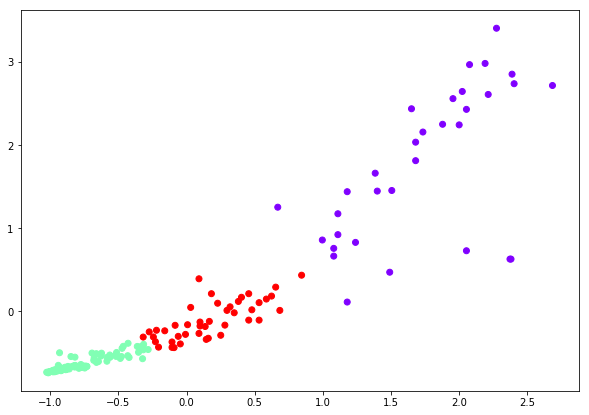

In [51]:
plt.figure(figsize=(10, 7))  
plt.scatter(Countries_norm1[:,0], Countries_norm1[:,1], c=cluster.labels_, cmap='rainbow') 

They also look the same as K Means Clusters

Lets put in the original data with the clustered information into a single DF

In [52]:
Countries_PCA_Outlier_Income

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,index_values
23,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,23
82,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,82
91,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,91
114,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,114
123,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,123
133,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,133
145,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,145
157,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,157


In [53]:
Outliers_mapping = pd.read_csv("E:\Sushma\PCA\Assignment\Mapping.csv")

In [54]:
Outliers_mapping.head(25)

,ID,New_ID
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [55]:
Countries_PCA.head(30)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,index_values
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,3
4,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,4
5,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,5
6,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,6
7,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,7
8,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,8
9,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,9


In [56]:
Cluster_Map_Outliers = pd.merge(cluster_map,Outliers_mapping,how='inner', left_on='data_index', right_on = 'ID')

In [57]:
Cluster_Map_Outliers.head(30)

,data_index,cluster,ID,New_ID
0,0,5,0,0
1,1,11,1,1
2,2,11,2,2
3,3,2,3,3
4,4,10,4,4
5,5,10,5,5
6,6,2,6,6
7,7,6,7,7
8,8,13,8,8
9,9,1,9,9


In [58]:
##reading Dataset
Countries_Original = pd.read_csv("E:\Sushma\PCA\Assignment\Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
Countries_Original['index_v'] = Countries_Original.index.values

In [59]:
Countries_Cluster_Final = pd.merge(Countries_Original, Cluster_Map_Outliers,how='left', left_on='index_v', right_on = 'New_ID')

In [60]:
Countries_Cluster_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 15 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
index_v       167 non-null int64
data_index    159 non-null float64
cluster       159 non-null float64
ID            159 non-null float64
New_ID        159 non-null float64
dtypes: float64(11), int64(3), object(1)
memory usage: 20.9+ KB


In [61]:
Countries_Cluster_Final_Export = Countries_Cluster_Final[['country', 'child_mort','exports', 'health', 'imports', 'income'
                                                          ,'inflation','life_expec','total_fer','gdpp','index_v','New_ID','cluster'
                                                          ]]

In [62]:
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('E:\Sushma\PCA\Assignment\Countries_Cluster.xlsx')
Countries_Cluster_Final_Export.to_excel(writer,'Sheet1')
writer.save()


Checking the outliers of GDPP out of curiosity

In [83]:
a = [7,8,15,29,42,44,53,54,58,68,73,74,75,77,110,111,139,144,158,159]
Countries_Cluster_Final_Export[Countries_Cluster_Final_Export['index_v'].isin(a)]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,index_v,New_ID,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,7,7.0,6.0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,8,8.0,13.0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,15,15.0,13.0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,29,29.0,13.0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,42,42.0,4.0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,44,44.0,6.0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,53,53.0,13.0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,54,54.0,0.0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,58,58.0,13.0
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,68,68.0,0.0


They all belong to either 13, or 4, or 6 majorly. Japan, Iceland and France are in 0 but they dont need much attention as their health measures are also good.